# Atividade 5: Trabalhando com Dados do ENADE 2017

In [94]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape

(537436, 150)

### 1) Escolhendo tabela com dados de interessse

In [95]:
tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_UF_CURSO', 'QE_I06', 'QE_I23'])
tabela.head(10)

,NT_GER,CO_UF_CURSO,QE_I06,QE_I23
0,"52,6",51,A,D
1,"63,1",51,C,C
2,"33,7",51,B,B
3,"58,1",51,D,C
4,"46,3",51,B,B
5,"64,2",51,B,B
6,"41,4",51,B,D
7,"48,8",51,B,B
8,"52,9",51,B,C
9,"62,7",51,B,D


### 2) Limpeza de dados

In [96]:
#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
print(tabela['NT_GER'])
print(tabela['NT_GER'].mean())

0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
534887    43.8
534888    46.9
534890    48.2
534891    49.6
534892    63.2
534893    31.9
534895    71.5
534896    59.6
534897    15.1
534898    44.7
534900    30.8
534901    16.3
534902    66.3
534903    34.9
534904    71.9
534905    56.0
534906    45.9
534907    43.3
534908    68.4
534909    39.3
534910    69.6
534911    53.8
534912    15.2
534913    59.8
534914    42.7
534915    35.6
534916    66.1
534917    70.2
534918    51.9
534919    52.8
Name: NT_GER, Length: 449932, dtype: float64
43.52396851079471


In [97]:
tabela['NT_GER'].describe()

count    449932.000000
mean         43.523969
std          14.080110
min           0.000000
25%          33.400000
50%          42.900000
75%          53.100000
max          98.100000
Name: NT_GER, dtype: float64

### 3) Exploração de dados

In [98]:
#Mapeando Alternativas em números
tabela['QE_I23'] = tabela['QE_I23'].map({'A': 0, 'B': 3, 'C': 7, 'D': 12,'E': 15})

In [99]:
#Calcula a média para alunos que moram em minas
#CO_UF_CURSO = 31
minas = tabela[tabela['CO_UF_CURSO']==31]

#Calcula a média para alunos que moram em minas
#CO_UF_CURSO = 35
sp = tabela[tabela['CO_UF_CURSO']==35]

In [100]:
#Calcula a média para alunos que moram com pais em Minas Gerais
#QE_I06 = B

moraPaisMG = minas[minas['QE_I06']=='B']

print(moraPaisMG)

        NT_GER  CO_UF_CURSO QE_I06  QE_I23
3707      42.2           31      B    15.0
3715      73.6           31      B    15.0
3723      59.3           31      B     7.0
3727      36.8           31      B     7.0
3730      37.7           31      B    12.0
3731      48.3           31      B    12.0
3732      59.7           31      B     3.0
3735      49.8           31      B     3.0
3736      54.6           31      B     3.0
3738      65.7           31      B     7.0
3742      58.3           31      B    15.0
3754      74.0           31      B    12.0
3755      64.4           31      B    12.0
3768      80.2           31      B    12.0
3769      60.2           31      B    12.0
3770      73.2           31      B     7.0
3771      48.3           31      B     0.0
3779      65.3           31      B    15.0
3785      43.7           31      B     7.0
3799      41.5           31      B    15.0
3813      29.5           31      B    12.0
3815      68.7           31      B     0.0
3818      2

In [101]:
moraPaisMG['NT_GER'].describe()

count    26308.000000
mean        45.922221
std         13.834198
min          0.000000
25%         36.200000
50%         45.400000
75%         55.400000
max         95.100000
Name: NT_GER, dtype: float64

In [102]:
#Calcula a média para alunos que moram com pais em São Paulo
#QE_I06 = B

moraPaisSP = sp[sp['QE_I06']=='B']

print(moraPaisSP)

        NT_GER  CO_UF_CURSO QE_I06  QE_I23
3927      41.8           35      B     7.0
3928      40.3           35      B     3.0
3936      50.8           35      B     7.0
3940      41.2           35      B    15.0
3941      38.5           35      B    15.0
3951      67.9           35      B     7.0
3962      57.0           35      B    12.0
3968      57.9           35      B     7.0
3969      66.1           35      B     7.0
3971      62.0           35      B     7.0
3972      55.3           35      B     7.0
3974      16.2           35      B    15.0
3976      40.7           35      B     7.0
3977      34.9           35      B    12.0
3979      54.1           35      B     7.0
3984      51.1           35      B     3.0
3985      48.4           35      B    12.0
3987      43.8           35      B    15.0
3990      39.3           35      B     7.0
3994      64.9           35      B    15.0
3995      63.8           35      B    12.0
3996      60.8           35      B    15.0
3998      3

In [103]:
moraPaisSP['NT_GER'].describe()

count    59946.000000
mean        43.637195
std         13.696504
min          0.000000
25%         33.900000
50%         43.000000
75%         53.000000
max         93.500000
Name: NT_GER, dtype: float64

In [104]:
#Calcula a média para alunos que moram com outras pessoas em Minas Gerais
#QE_I06 = D

moraOutrasMG = minas[minas['QE_I06']=='D']

print(moraOutrasMG)

        NT_GER  CO_UF_CURSO QE_I06  QE_I23
3705      74.4           31      D     7.0
3706      58.5           31      D    15.0
3708      49.1           31      D     7.0
3709      75.1           31      D    12.0
3711      61.9           31      D     3.0
3712      71.0           31      D    15.0
3713      70.9           31      D     3.0
3714      84.6           31      D     3.0
3716      55.0           31      D    12.0
3718      60.0           31      D    12.0
3720      49.1           31      D     7.0
3721      45.7           31      D    12.0
3722      72.8           31      D    15.0
3724      67.7           31      D    15.0
3725      63.4           31      D    12.0
3726      68.9           31      D     7.0
3728      57.9           31      D     3.0
3733      33.3           31      D     3.0
3734      19.3           31      D     3.0
3737      72.4           31      D     7.0
3743      74.4           31      D    15.0
3744      51.9           31      D    12.0
3745      5

In [105]:
moraOutrasMG['NT_GER'].describe()

count    7088.000000
mean       49.442339
std        13.729479
min         0.000000
25%        39.900000
50%        49.500000
75%        59.100000
max        95.100000
Name: NT_GER, dtype: float64

In [106]:
#Calcula a média para alunos que moram com outras pessoas em Minas Gerais
#QE_I06 = D

moraOutrasSP = sp[sp['QE_I06']=='D']

print(moraOutrasSP)

        NT_GER  CO_UF_CURSO QE_I06  QE_I23
3926      71.7           35      D     7.0
3929      50.8           35      D    12.0
3930      27.4           35      D     3.0
3933      46.3           35      D    12.0
3934      46.1           35      D     7.0
3939      66.5           35      D    15.0
3944      53.4           35      D     3.0
3945      56.4           35      D     0.0
3948      54.9           35      D    15.0
3956      65.3           35      D     7.0
3957      62.1           35      D     7.0
3960      63.5           35      D     3.0
3961      68.5           35      D    12.0
3963      57.2           35      D     7.0
3965      52.6           35      D     7.0
3967      39.9           35      D    15.0
3970      41.7           35      D     7.0
3978      42.3           35      D     7.0
3980      43.8           35      D    12.0
3981      35.5           35      D     7.0
3982      44.6           35      D     7.0
3989      46.1           35      D     7.0
3992      1

In [107]:
moraOutrasSP['NT_GER'].describe()

count    6068.000000
mean       48.168820
std        14.949128
min         0.000000
25%        38.000000
50%        48.800000
75%        58.700000
max        92.300000
Name: NT_GER, dtype: float64

In [108]:
#Somente nota de quem respondeu quantas horas estuda
moraPaisMG=moraPaisMG.loc[(moraPaisMG['QE_I23'].notnull())]
moraPaisMG.NT_GER.describe()

count    26308.000000
mean        45.922221
std         13.834198
min          0.000000
25%         36.200000
50%         45.400000
75%         55.400000
max         95.100000
Name: NT_GER, dtype: float64

In [109]:
#Somente nota de quem respondeu quantas horas estuda
moraPaisSP=moraPaisSP.loc[(moraPaisSP['QE_I23'].notnull())]
moraPaisSP.NT_GER.describe()

count    59946.000000
mean        43.637195
std         13.696504
min          0.000000
25%         33.900000
50%         43.000000
75%         53.000000
max         93.500000
Name: NT_GER, dtype: float64

In [110]:
#Somente nota de quem respondeu quantas horas estuda
moraOutrasMG=moraOutrasMG.loc[(moraOutrasMG['QE_I23'].notnull())]
moraOutrasMG.NT_GER.describe()

count    7088.000000
mean       49.442339
std        13.729479
min         0.000000
25%        39.900000
50%        49.500000
75%        59.100000
max        95.100000
Name: NT_GER, dtype: float64

In [111]:
#Somente nota de quem respondeu quantas horas estuda
moraOutrasSP=moraOutrasSP.loc[(moraOutrasSP['QE_I23'].notnull())]
moraOutrasSP.NT_GER.describe()

count    6068.000000
mean       48.168820
std        14.949128
min         0.000000
25%        38.000000
50%        48.800000
75%        58.700000
max        92.300000
Name: NT_GER, dtype: float64

### 4) Gráficos

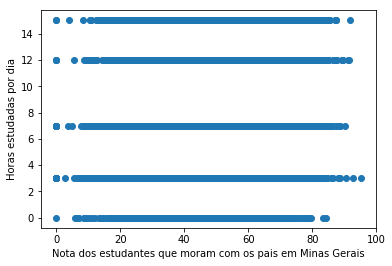

In [112]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( moraPaisMG.NT_GER, moraPaisMG.QE_I23)
plt.ylabel('Horas estudadas por dia')
plt.xlabel('Nota dos estudantes que moram com os pais em Minas Gerais')
plt.show()

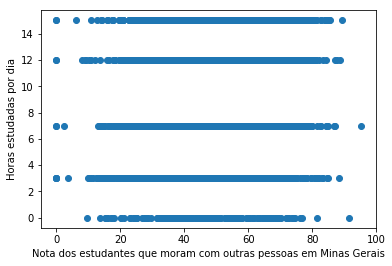

In [113]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( moraOutrasMG.NT_GER, moraOutrasMG.QE_I23)
plt.ylabel('Horas estudadas por dia')
plt.xlabel('Nota dos estudantes que moram com outras pessoas em Minas Gerais')
plt.show()

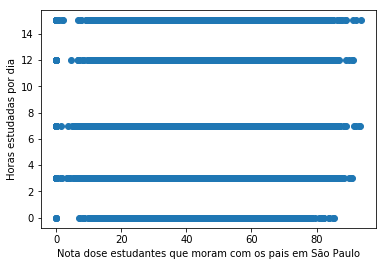

In [114]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( moraPaisSP.NT_GER, moraPaisSP.QE_I23)
plt.ylabel('Horas estudadas por dia')
plt.xlabel('Nota dose estudantes que moram com os pais em São Paulo')
plt.show()

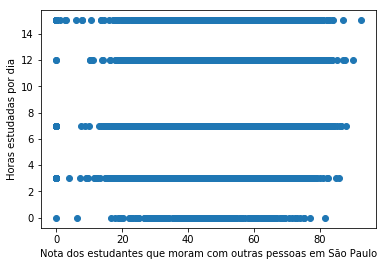

In [115]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( moraOutrasSP.NT_GER, moraOutrasSP.QE_I23)
plt.ylabel('Horas estudadas por dia')
plt.xlabel('Nota dos estudantes que moram com outras pessoas em São Paulo')
plt.show()

### 5) Verificando que existe variação

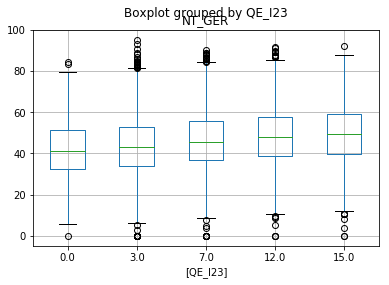

In [116]:
qeI23PaisMG = pandas.DataFrame(moraPaisMG, columns=['NT_GER', 'QE_I23'])
qeI23PaisMG.boxplot(by='QE_I23')

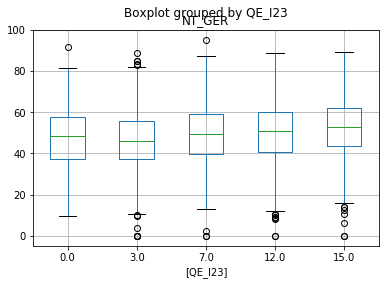

In [117]:
qeI23OutrasMG = pandas.DataFrame(moraOutrasMG, columns=['NT_GER', 'QE_I23'])
qeI23OutrasMG.boxplot(by='QE_I23')

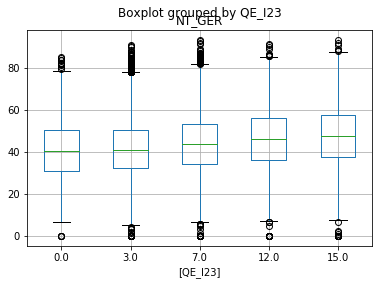

In [128]:
qeI23PaisSP = pandas.DataFrame(moraPaisSP, columns=['NT_GER', 'QE_I23'])
qeI23PaisSP.boxplot(by='QE_I23')

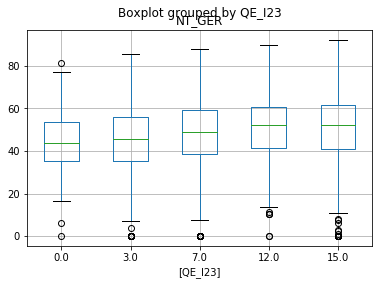

In [119]:
qeI23OutrasSP = pandas.DataFrame(moraOutrasSP, columns=['NT_GER', 'QE_I23'])
qeI23OutrasSP.boxplot(by='QE_I23')

### 6) Análise de variância (ANOVA). Nota geral agrupada pela questão 23

In [120]:
tabela['QE_I23'] = tabela['QE_I23'].map({ 0 :'A', 3 : 'B', 7 :'C', 12 :'D', 15 :'E'})
tabela['NT_GER'].groupby(tabela['QE_I23']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I23,,,,,,,,
A,17106.0,40.417152,14.334967,0.0,29.9,39.6,50.1,93.1
B,181399.0,41.533854,13.582981,0.0,31.8,40.8,50.6,98.1
C,133289.0,44.279702,13.869305,0.0,34.4,43.8,53.8,96.4
D,57856.0,46.061238,14.183914,0.0,36.0,45.7,55.9,97.0
E,53218.0,47.434507,14.484109,0.0,37.2,47.3,57.6,95.4


### 7) Teste de suposições.

(0.9957844018936157, 0.008740131743252277)
(0.9984173774719238, 0.0018865116871893406)


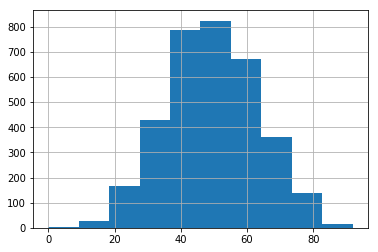

In [122]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==0]))

print(stats.shapiro(qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==15]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==15].hist()

(0.993804395198822, 0.6676777005195618)
(0.9948428869247437, 6.755581125617027e-05)


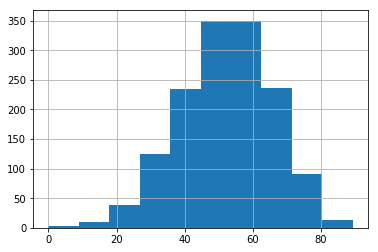

In [124]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==0]))

print(stats.shapiro(qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==15]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==15].hist()

(0.9931306838989258, 2.3116715139326338e-11)
(0.9985318779945374, 1.0190023203904275e-05)


C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


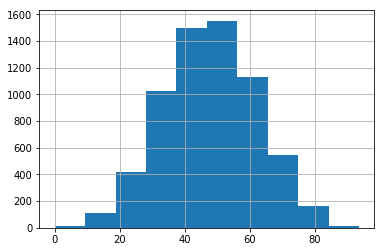

In [132]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==0]))

print(stats.shapiro(qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==15]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==15].hist()

(0.9941361546516418, 0.4083026349544525)
(0.9828819036483765, 4.722251478739281e-09)


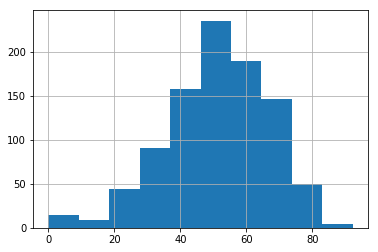

In [127]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==0]))

print(stats.shapiro(qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==15]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==15].hist()

In [138]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==0], qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==15])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==0], qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==15])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==0], qeI23PaisMG.NT_GER.loc[qeI23PaisMG.QE_I23 ==15])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=1196180.000, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=190.248, p=0.000
Distribução diferente
Anova: Estatisticas=199.600, p=0.000
Distribução diferente


In [139]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==0], qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==15])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==0], qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==15])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==0], qeI23OutrasMG.NT_GER.loc[qeI23OutrasMG.QE_I23 ==15])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=106050.000, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=13.514, p=0.000
Distribução diferente
Anova: Estatisticas=16.476, p=0.000
Distribução diferente


In [142]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==0], qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==15])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==0], qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==15])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==0], qeI23PaisSP.NT_GER.loc[qeI23PaisSP.QE_I23 ==15])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=7737718.500, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=476.653, p=0.000
Distribução diferente
Anova: Estatisticas=484.552, p=0.000
Distribução diferente


In [143]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==0], qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==15])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==0], qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==15])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==0], qeI23OutrasSP.NT_GER.loc[qeI23OutrasSP.QE_I23 ==15])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=89793.000, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=44.250, p=0.000
Distribução diferente
Anova: Estatisticas=37.516, p=0.000
Distribução diferente
